___
---

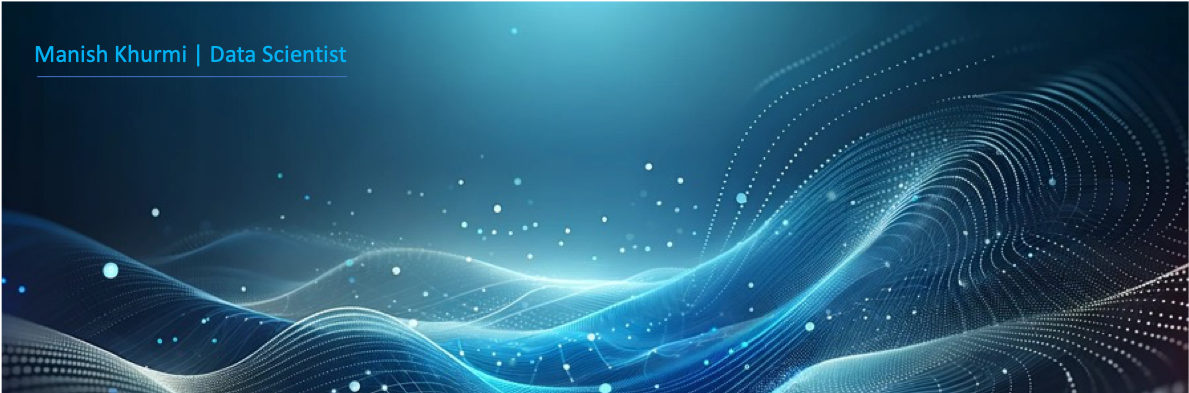
___

# Data-Driven Analysis: Exploring the 2008 Stock Market Crash

This project delves into real web-extracted financial data, navigating the challenges of cleaning real-world datasets. Through heatmap visualizations, time series analyses, and varied analytical techniques. It is not intended to be a in-depth financial project, instead more an application of data cleaning and visualisations to better understand financial data.

____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

import datetime as dt
import seaborn as sns 
import cufflinks as cf
import plotly.graph_objects as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

## Data

We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

------------

In [2]:
import yfinance as yf
import datetime

In [3]:
# Define the stock symbol for Bank of America
symbol = "BAC"

# Define the date range
start_date = "2006-01-01"
end_date = "2016-01-01"

# Fetch historical stock data for Bank of America
bank_data = yf.download(symbol, start=start_date, end=end_date)

# Display the data for Bank of America
print(f"Data for {symbol}:")
print(bank_data)


[*********************100%%**********************]  1 of 1 completed
Data for BAC:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.168701  16296700
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.827070  17757900
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.868044  14970700
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.820219  12599800
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.840721  15619400
...               ...        ...        ...        ...        ...       ...
2015-12-24  17.320000  17.379999  17.219999  17.270000  14.553581  29369400
2015-12-28  17.219999  17.230000  16.980000  17.129999  14.435604  41777500
2015-12-29  17.250000  17.350000  17.160000  17.280001  14.562010  45670400
2015-12-30  17.200001  17.240000  17.040001  17.049999  14.368183  35066400
2015-

In [4]:
import yfinance as yf
import datetime

# Define the list of bank stock symbols
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

# BAC = Bank of America 
# C = CitiGroup
# GS = Goldman Sachs
# JMP = JP Morgan
# MS = Morgan Stanley
# WFC = Wells Fargo 

# Define the date range
start_date = "2006-01-01"
end_date = "2016-01-01"

# Create a dictionary to store the dataframes
bank_dataframes = {}

# Fetch historical stock data for each bank and save as a dataframe
for symbol in tickers:
    bank_dataframes[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Display the data for each bank and save them as dataframes
for symbol, data in bank_dataframes.items():
    df_name = symbol  # Use the stock symbol as the variable name
    globals()[df_name] = data  # Create a dataframe variable with the stock symbol as the name
    print(f"Data for {symbol}:")
    print(data)

# Now we have dataframes named after each bank symbol, such as BAC, C, GS, JPM, MS, WFC.
# We can access them like BAC, C, GS, JPM, MS, WFC.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data for BAC:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.168701  16296700
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.827070  17757900
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.868044  14970700
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.820219  12599800
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.840721  15619400
...               ...        ...        

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
# Already done when creating the data frames 
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks_list = [BAC, C, GS, JPM, MS, WFC]
#bank_stocks = pd.concat(bank_stocks_list, axis = 1 )

bank_stocks = pd.concat(bank_dataframes, axis=1, keys=["BAC", "C", "GS", "JPM", "MS", "WFC"])

# Optionally, you can rename the columns to match the bank symbols
#bank_stocks.columns = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

bank_stocks.head()
#15102 rows

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.168701  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.827070  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.868044  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.820219  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.840721  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  33.585464  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  33.608486  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  33.700642  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  33.735210  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  34.092316  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.369587  11016400  
2006-01-04  31.530001  19.144932  10870000  
2006-01-05  31.495001  19.123678  10158000  
2006-01-06  31.680000  19.236010   8403800  
2006-01-09  31.674999  19.232973   5619600  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.168701  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.827070  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.868044  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.820219  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.840721  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.585464  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.608486  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.700642  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.735210  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.092316  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.369587  11016400  
2006-01-04   31.530001  19.144932  10870000  
2006-01-05   31.495001  19.123678  10158000  
2006-01-06   31.680000  19.236010   8403800  
2006-01-09   31.674999  19.232973   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period? **

In [9]:
bank_stocks.head(2)

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.168701  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.827070  17757900   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   

Bank Ticker                                       WFC                  \
Stock Info       Close  Adj Close   Volume       Open    High     Low   
Date                                                                    
2006-01-03   58.310001  33.585464  5377000  31.600000  31.975  31.195   
2006-01-04   58.349998  33.608486  7977800  31.799999  31.820  31.365   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.369587  11016400  
2006-01-04   31.530001  19.144932  10870000  

[2 rows x 36 columns]

In [10]:
# From the solutions 

for tick in tickers:
    print(bank_stocks[tick]['Close'].max())
    
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).max()

54.900001525878906
564.0999755859375
247.9199981689453
70.08000183105469
89.30000305175781
58.52000045776367


Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [11]:
max_close_values = bank_stocks.xs(key = 'Close', axis=1, level=1).max()
max_close_values.round(2)

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [13]:
# Breaking down

    # pct_change gives the fractional change from the previous value from the row before 
    #create a data set called returns that captures all the close values (returns) for each bank. 

        #1. extracting the close values for each bank 
        #2. puting those close values in a data frame 
        #3. use pct_change to give the fractional changes 

In [14]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

# Breaking down the above for loop 

#for tick in tickers
    # we could change it to..
        # for x in tickers: 

# bankstocks[tick]['Close'].pct_change 
    # Extracts the Close values of a ticker e.g BAC and applies the .pct() method to get the fractional change of returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### Do the above steps by creating my own data frames?

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

/Users/manishkhurmi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



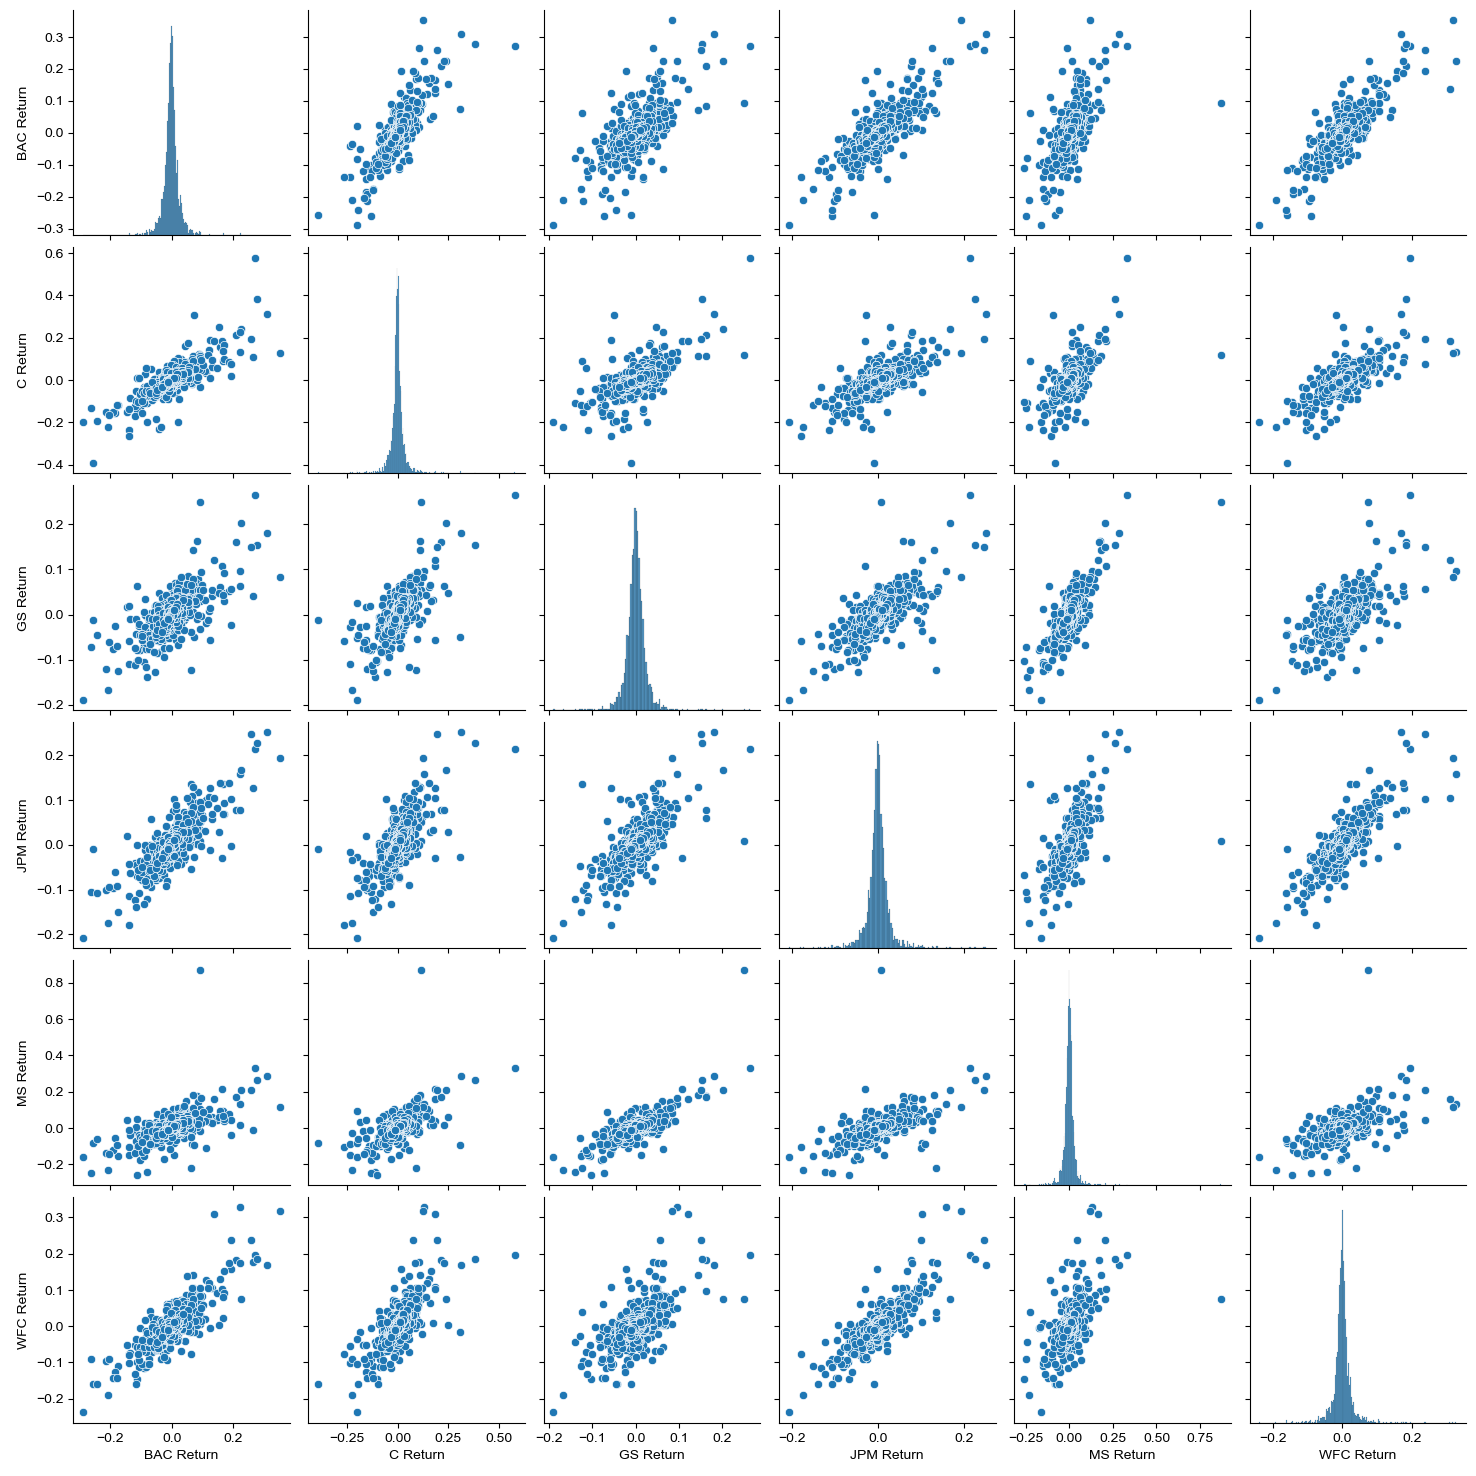

In [15]:
sns.pairplot(returns[1:], diag_kind="hist", aspect = 1)

# Add Grid
sns.set_style('whitegrid')

What stock stands out? and Why?

- CitiGroup's stock stands out to me. Citigroups returns are fairly uncorrelated to the returns other major banks. This is shown by CitiGroups return scatter plots vs other banks, where they are seen to be fairly flat indicating low correlation. The other major banks each share a positive correlation with each of their returns, indicating that if one bank is making money (positive returns) then the other major banks apart from Citigroup are too.
- Citigroup's Histogram shows that most of the returns centre around zero, indicating the Bank's returns have stayed around zero. 
- Bank of America and Morgan Stanley show the strongest positive correlation.

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [16]:
# Worst Day dor each Bank
# Minimum value from each column (level = 0)
returns.idxmin()#axis = 0)

# when axis = 0, returns index (date)  for the column with the lowest value
# when axis = 1, returns the column with which had the lowest value for the corresponding index

# Used Solutions

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [17]:
# Best Day for each Bank 
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [18]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [19]:
# **** From Solutions ****

# 2015 STD 
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_66479/520701193.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MS Return', ylabel='Density'>

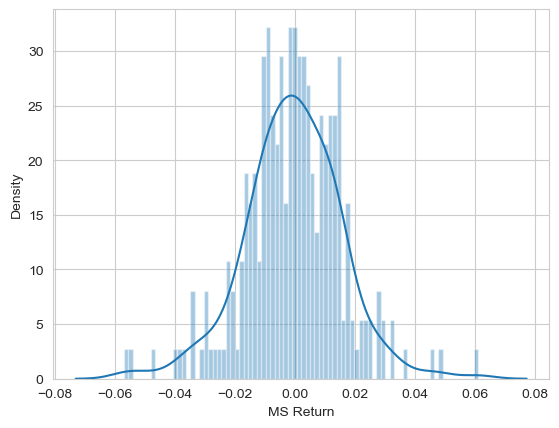

In [20]:
# All Years 
sns.distplot(returns['MS Return']['2015-01-01':'2015-12-31'], bins = 80)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_66479/4174283068.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C Return', ylabel='Density'>

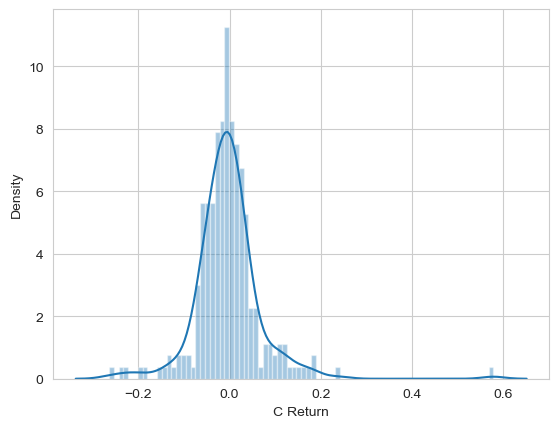

In [21]:
sns.distplot(returns['C Return']['2008-01-01':'2008-12-31'], bins = 80)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [23]:
bank_stocks

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.168701  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.827070  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.868044  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.820219  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.840721  15619400   
...                ...        ...        ...        ...        ...       ...   
2015-12-24   17.320000  17.379999  17.219999  17.270000  14.553581  29369400   
2015-12-28   17.219999  17.230000  16.980000  17.129999  14.435604  41777500   
2015-12-29   17.250000  17.350000  17.160000  17.280001  14.562010  45670400   
2015-12-30   17.200001  17.240000  17.040001  17.049999  14.368183  35066400   
2015-12-31   17.010000  17.070000  16.830000  16.830000  14.182793  47153000   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   
...                 ...         ...         ...         ...  ...        ...   
2015-12-24    52.480000   52.970001   52.450001   52.709999  ...  32.439999   
2015-12-28    52.570000   52.570000   51.959999   52.380001  ...  31.950001   
2015-12-29    52.759998   53.220001   52.740002   52.980000  ...  32.330002   
2015-12-30    52.840000   52.939999   52.250000   52.299999  ...  32.200001   
2015-12-31    52.070000   52.389999   51.750000   51.750000  ...  31.770000   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.585464  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.608486  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.700642  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.735210  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.092316  4144500  31.674999  31.825001  31.555000   
...                ...        ...      ...        ...        ...        ...   
2015-12-24   32.480000  26.070410  2798200  54.970001  55.090000  54.709999   
2015-12-28   32.169998  25.821583  5420300  54.549999  54.779999  54.169998   
2015-12-29   32.549999  26.126596  6388200  55.110001  55.349998  54.990002   
2015-12-30   32.230000  25.869745  5057200  55.270000  55.310001  54.790001   
2015-12-31   31.809999  25.532625  8154300  54.509998  54.950001  54.220001   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.369587  11016400  
2006-01-04   31.530001  19.144932  10870000  
2006-01-05   31.495001  19.123678  10158000  
2006-01-06   31.680000  19.236010   8403800  
2006-01-09   31.674999  19.232973   5619600  
...                ...        ...       ...  
2015-12-24   54.820000  43.350605   4999400  
2015-12-28   54.680000  43.239895   8288800  
2015-12-29   55.290001  43.722263   7894900  
2015-12-30   54.889999  43.405949   8016900  
2015-12-31   54.360001  42.986839  10929800  

[2517 rows x 36 colu

In [24]:
# For Loop to create the Closes Time Series df

ts = pd.DataFrame()

for tick in tickers: 
    ts[tick + ' Close'] = bank_stocks[tick]['Close']

ts.head()

,BAC Close,C Close,GS Close,JPM Close,MS Close,WFC Close
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


<Axes: xlabel='Date'>

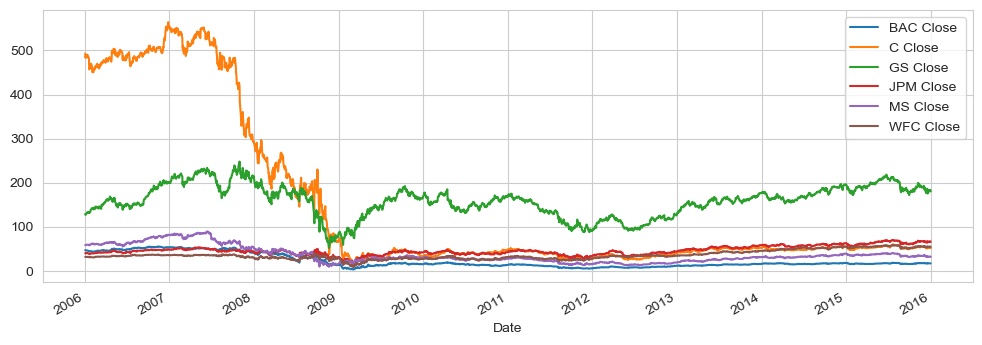

In [46]:
# Time Series 
ts.plot.line(figsize = (12, 4))

In [26]:
# Zoom in on Crash
ts.iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

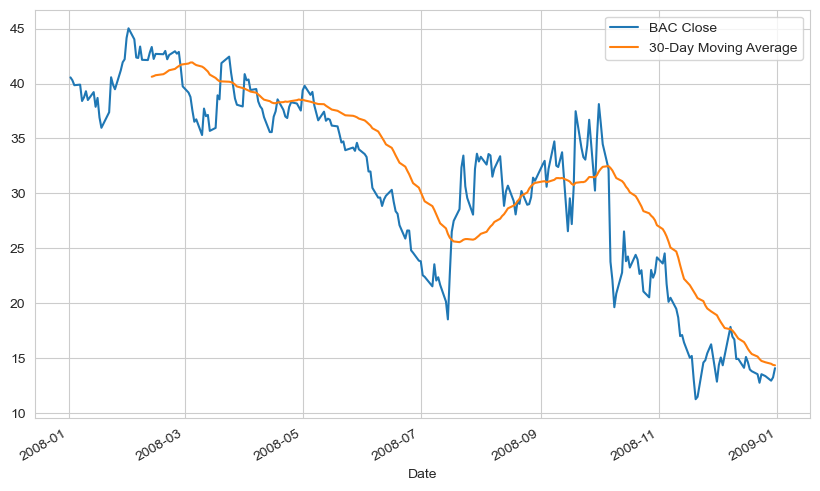

In [28]:
# 2008 BAC Close Data Frame
ts_BAC = pd.DataFrame(ts['BAC Close']['2008-01-01':'2008-12-31'])

# Insert new column that calculates the 30-day moving average
ts_BAC['30-Day Moving Average'] = ts_BAC['BAC Close'].rolling(window=30).mean()

ts_BAC.plot.line(figsize = (10,6))

plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: >

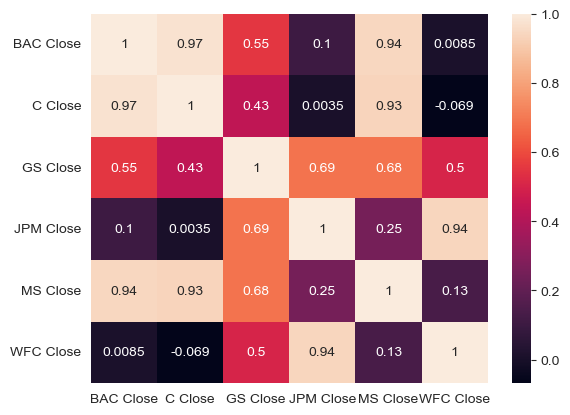

In [29]:
sns.heatmap(ts.corr(), annot=True, )

** Optional: Use seaborn's clustermap to cluster the correlations together:**

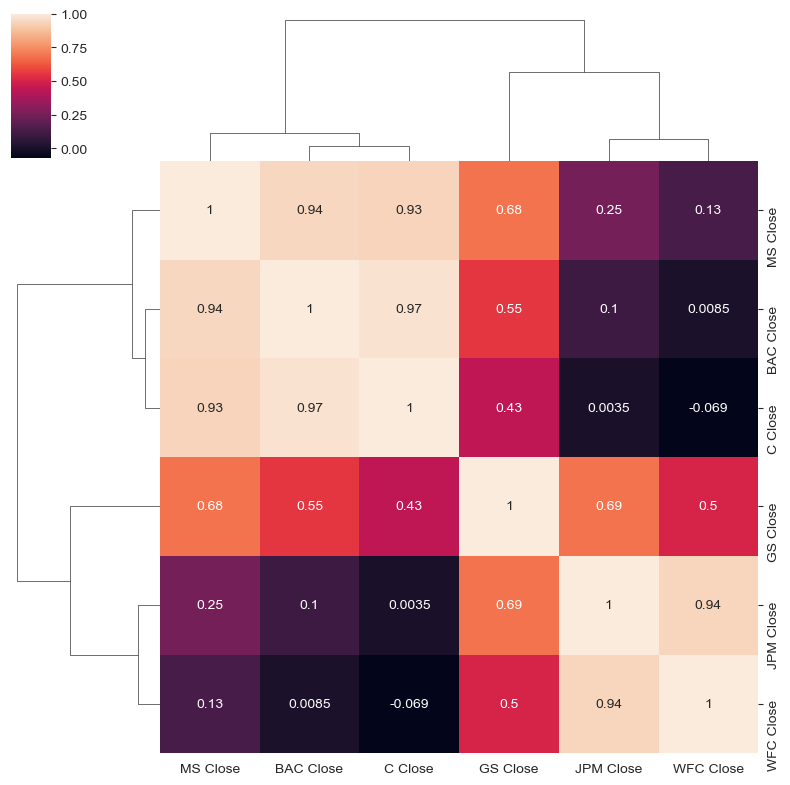

In [30]:
sns.clustermap(ts.corr(), annot = True, figsize = (8, 8))

- Here Seaborn had grouped together C, BAC & MS based on thier correlation and WFC, JPM & GS.

In [44]:
import plotly.graph_objects as go

# Assuming 'ts' is a DataFrame with correlation data
heatmap = go.Figure(data=go.Heatmap(
                   z=ts.corr(), colorscale='rdylbu'))

heatmap.update_layout(
    width=600,
    height=600,
    xaxis=dict(tickvals=list(range(len(ts.columns))), ticktext=ts.columns),
    yaxis=dict(tickvals=list(range(len(ts.columns))), ticktext=ts.columns)
)

heatmap.show()

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

### **** From Solutions *****


In [32]:
# 2015 - 2016 BAC Candle Plot
# Tells us if the stock went up or down based on the colour
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [33]:
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods = [3,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [34]:
# Shows the standard deviation of the stock across time
    # Upper and Lower bands of the stock
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')